In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.table import Table
from toolbox import plot_tools

sns.set_style('ticks')

C:\Users\ariel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [65]:
ids, angles, asymmetries = np.genfromtxt('C:/Users/ariel/Workspace/GASP/High-z/PSB Asymetries/Data/asymmetries.dat').transpose()
psb_table = Table.read('C:/Users/ariel/Workspace/GASP/High-z/PSB Asymetries/Data/psb_table_integrated.fits')

psb_table['direction'] = psb_table['direction'].astype(str)
psb_table['cluster_id'] = [psb_table['galaxy'][i].split('_')[0] for i in range(len(psb_table))]


flag = (psb_table['direction'] != 'Unclassified')

asymmetries = asymmetries[flag]
psb_table = psb_table[flag]

In [23]:
psb_table.keys()

['galaxy',
 'nspaxels',
 'above_3sigma',
 'flux_valid_spaxels',
 'flux_above_3sigma',
 'hdelta_flag',
 'redshift',
 'mass',
 'mass_corr',
 'integrated_hdelta',
 'integrated_hbeta',
 'integrated_hdelta_syn',
 'integrated_hbeta_syn',
 'sfh',
 'meant98',
 'mediant98',
 'sigmat98',
 'deltat98',
 'mean_mfraction',
 'mean_mwage15',
 'mean_sfe',
 'mw_sfe',
 'mw_mfraction',
 'mw_t98',
 'median_mfraction',
 'median_mwage15',
 'totmassfrac15',
 'median_sfe',
 'total_area',
 'v_rel',
 'direction',
 'clearburst',
 'mfraction_intsfh',
 't98_intsfh',
 'sfe_intsfh',
 'quenching_rate']

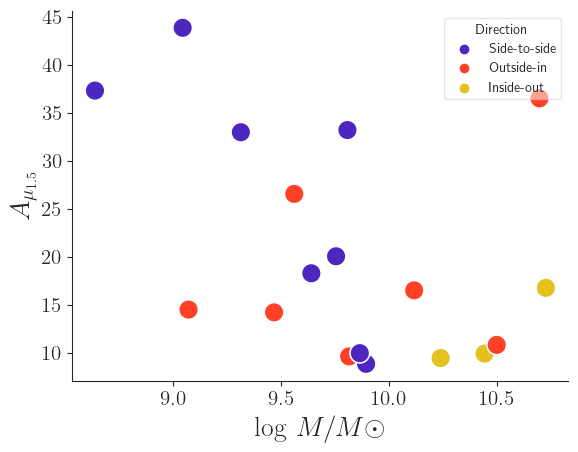

In [82]:
sns.scatterplot(x=np.log10(psb_table['mass']).tolist(), y=np.absolute(asymmetries).tolist(), hue=psb_table['direction'], s=200, palette='CMRmap')

plt.legend(framealpha=0.5, loc=1, title='Direction')

sns.despine()

plt.xlabel(r'$\log\,M/M\odot$', fontsize=20)
plt.ylabel(r'$A_{\mu_{1.5}}$', fontsize=20)

plt.tick_params(axis='both', labelsize=15)

<Axes: >

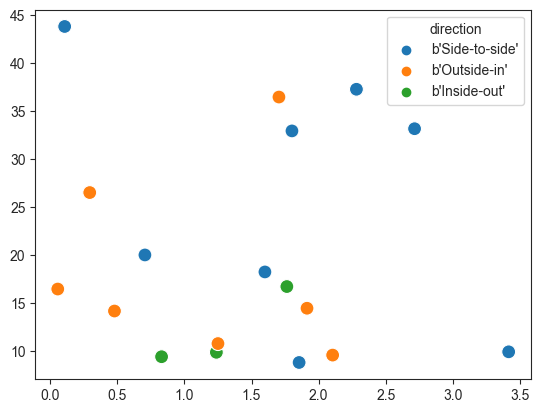

In [35]:
sns.scatterplot(x=np.absolute(psb_table['v_rel']).tolist(), y=np.absolute(asymmetries).tolist(), hue=psb_table['direction'], s=100)